## Training & Evaluation

In [70]:
import sys
sys.path.append('..')

import pandas as pd
from src.training.utils import tune_params
from sklearn.linear_model import LogisticRegression
from src.evaluation.utils import plot_confusion_matrix, plot_model_performance, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

from joblib import dump

## Load the data

In [71]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')

## Hyperparameters Tuning

**Separate features and target**

In [72]:
X_train = train_df.drop(columns=['Loan_Status'])
y_train = train_df['Loan_Status']

X_val = val_df.drop(columns=['Loan_Status'])
y_val = val_df['Loan_Status']

**Tune the hyperparameters**

In [73]:
# best_params = tune_params(X_train, y_train, X_val, y_val)
# best_params

**Train the best model**

In [74]:
# best_params.pop('classifier')
# print('Best params:', best_params)

In [75]:
# model = LogisticRegression(**best_params)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluation

In [76]:
y_pred = model.predict(X_train)
report = classification_report(
    y_pred, y_train, target_names=["Rejected", "Approved"]
)
print(report)

              precision    recall  f1-score   support

    Rejected       0.40      0.90      0.56        73
    Approved       0.98      0.78      0.87       448

    accuracy                           0.80       521
   macro avg       0.69      0.84      0.72       521
weighted avg       0.90      0.80      0.83       521



In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_true = y_train
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.800383877159309
Recall:  0.9804469273743017
Precision:  0.7834821428571429


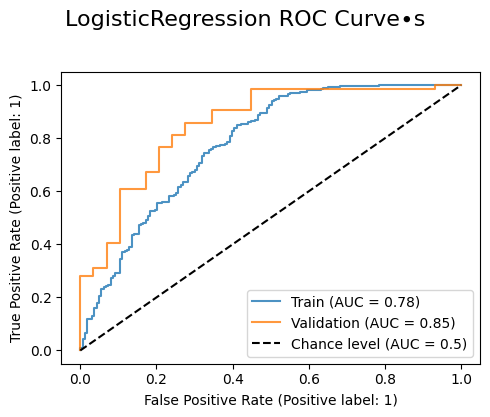

In [78]:
plot_roc_curve(
    model, 
    X_train, y_train,
    X_val, y_val,
    title1="Train", title2="Validation"    
)

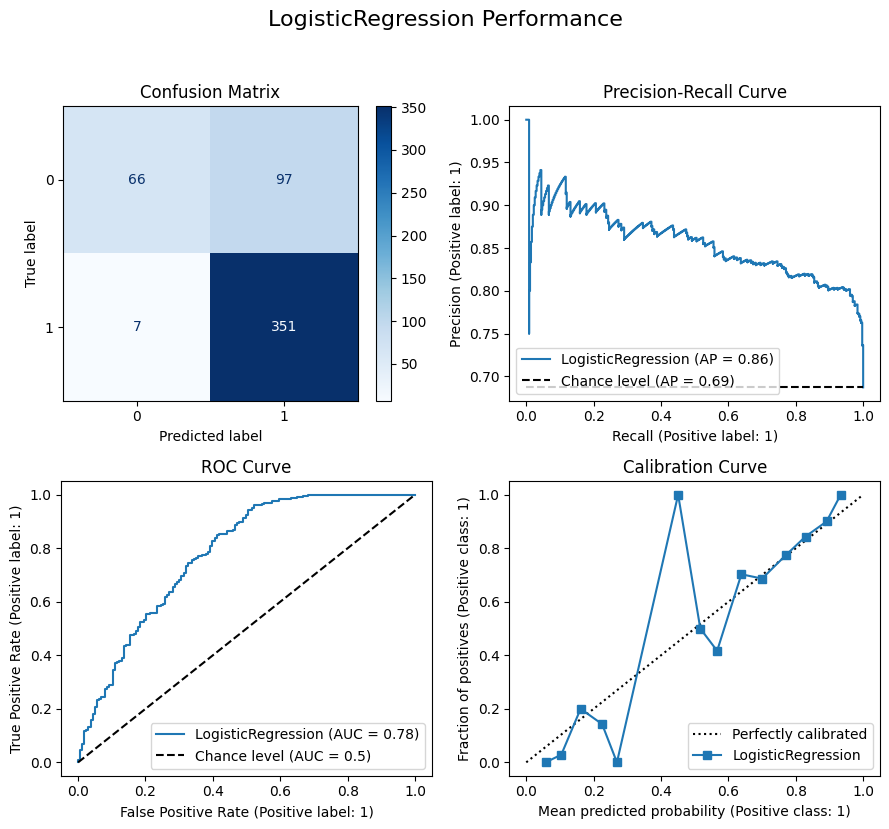

In [79]:
plot_model_performance(model, X_train, y_train)

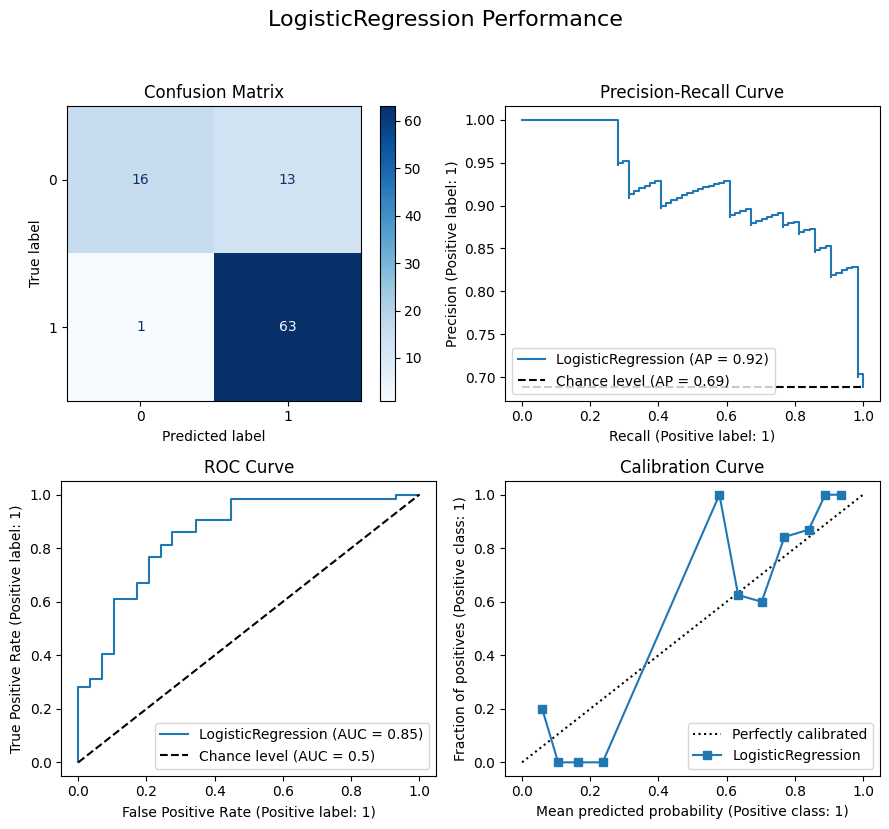

In [80]:
plot_model_performance(model, X_val, y_val)

## Save the model

In [81]:
with open('../models/model.pkl', 'wb') as f:
    dump(model, f)